Используя датасеты о продуктах и их продажах посчитайте корреляции:
* Пирсона
* Спирмена
* Мэтьюса
* Крамера

Ход работы:
* Прочтите данные о продажах и продуктах
* Соедините таблицы друг с другом по id продукта
* Посчитайте корреляцию Спирмена временного ряда продаж каждого продукта с каждым, используя соединенную таблицу
* Посчитайте корреляцию Пирсона временного ряда продаж каждого продукта с каждым, используя соединенную таблицу
* Найдите наиболее коррелирующий товар с American Chicken Hot Dogs по значению корреляции Спирмена и Пиарсона
* Постройте график зависимости продаж American Chicken Hot Dogs от найденного товара (scatterplot) и постройте два графика 1) зависимости продаж American Chicken Hot Dogs от времени 2) зависимости продаж найденного товара от времени (lineplot).
* Найдите корреляцию Мэтьюса между recyclable_package и low_fat
* Постройте гистограммы recyclable_package и low_fat.
* Найдите корреляцию Крамера между store_id и brand_name. Есть ли корреляция между этими признаками?
* Визуализируйте зависимость store_id и brand_name. Тут подумайте, как это можно сделать.

In [15]:
import pandas as pd

In [21]:
sales = pd.read_csv("foodmart.sales.tsv", sep = "\t")
products = pd.read_csv("foodmart.products.tsv", sep = "\t")


In [80]:
df = sales.merge(products, how="inner", on="product_id")
df.head()

,product_id,store_id,date,sales,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,4,6,1997-01-01,4,19,Washington,Washington Cream Soda,64412155747,3.64,10.60,9.60,True,False,26,10,22.90,18.90,7.93
1,25,6,1997-01-01,3,58,Blue Label,Blue Label Chicken Noodle Soup,62032982707,1.55,9.48,8.47,True,True,21,10,4.98,4.71,22.40
2,48,6,1997-01-01,3,11,Club,Club String Cheese,76026721596,1.88,6.31,3.30,True,True,17,7,5.22,18.70,11.20
3,76,6,1997-01-01,4,8,Red Spade,Red Spade Sliced Chicken,62054644227,1.69,18.10,17.10,False,True,4,7,14.60,13.50,3.42
4,119,6,1997-01-01,3,79,Faux Products,Faux Products Extra Moisture Shampoo,35068821310,2.28,20.10,19.10,False,False,7,12,7.86,8.33,14.70


In [64]:
df_agg = df.groupby(['product_name', 'date'])['sales'].sum().reset_index()

df_pivot = df_agg.pivot(index='date', columns='product_name', values='sales')
df_pivot = df_pivot.fillna(0)
corr_matrix_spearman = df_pivot.corr(method='spearman')

corr_matrix_spearman

product_name,ADJ Rosy Sunglasses,Akron City Map,Akron Eyeglass Screwdriver,American Beef Bologna,American Chicken Hot Dogs,American Cole Slaw,American Corned Beef,American Foot-Long Hot Dogs,American Low Fat Bologna,American Low Fat Cole Slaw,...,Washington Apple Juice,Washington Berry Juice,Washington Cola,Washington Cranberry Juice,Washington Cream Soda,Washington Diet Cola,Washington Diet Soda,Washington Mango Drink,Washington Orange Juice,Washington Strawberry Drink
product_name,,,,,,,,,,,,,,,,,,,,,
ADJ Rosy Sunglasses,1.000000,0.128561,-0.000775,0.027308,0.067274,0.012488,0.036745,0.109487,0.060987,0.054597,...,0.044089,0.175497,0.072031,0.059304,0.050614,0.072501,0.034633,0.183938,0.134090,-0.002216
Akron City Map,0.128561,1.000000,0.109360,0.185817,0.177279,0.039656,0.082616,0.025421,0.188802,0.090592,...,0.013755,0.051828,0.065376,-0.007212,0.059563,0.037389,0.092069,0.049580,0.168947,0.063492
Akron Eyeglass Screwdriver,-0.000775,0.109360,1.000000,0.108392,0.062239,0.176875,0.072842,0.155231,0.103568,0.079683,...,0.154491,0.093304,0.047174,0.108273,0.088679,0.036232,0.042683,0.034894,0.003143,0.122392
American Beef Bologna,0.027308,0.185817,0.108392,1.000000,0.039059,0.118889,0.071691,0.044870,0.074780,0.085526,...,-0.017488,0.056236,-0.133941,0.034294,0.120631,0.074401,0.090542,0.076475,0.149458,0.020618
American Chicken Hot Dogs,0.067274,0.177279,0.062239,0.039059,1.000000,0.129048,0.061968,0.018486,0.069384,0.034115,...,0.088869,0.074191,0.025195,0.120753,0.043889,0.111633,0.001604,0.003994,0.074101,0.078926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washington Diet Cola,0.072501,0.037389,0.036232,0.074401,0.111633,0.082666,0.159112,0.140574,0.124283,0.028087,...,0.008031,0.107132,0.023364,0.006046,0.143591,1.000000,0.088251,0.035299,0.063933,0.132057
Washington Diet Soda,0.034633,0.092069,0.042683,0.090542,0.001604,0.067806,0.021543,0.065477,0.035984,0.103894,...,-0.046896,0.115148,0.197893,0.026701,0.103205,0.088251,1.000000,0.080670,0.053612,-0.064084
Washington Mango Drink,0.183938,0.049580,0.034894,0.076475,0.003994,0.094196,0.065583,0.002807,0.092612,0.008598,...,0.008010,0.028470,0.061957,0.026224,0.137182,0.035299,0.080670,1.000000,0.053490,0.032139


In [65]:
corr_matrix_pearson = df_pivot.corr(method="pearson")
corr_matrix_pearson

product_name,ADJ Rosy Sunglasses,Akron City Map,Akron Eyeglass Screwdriver,American Beef Bologna,American Chicken Hot Dogs,American Cole Slaw,American Corned Beef,American Foot-Long Hot Dogs,American Low Fat Bologna,American Low Fat Cole Slaw,...,Washington Apple Juice,Washington Berry Juice,Washington Cola,Washington Cranberry Juice,Washington Cream Soda,Washington Diet Cola,Washington Diet Soda,Washington Mango Drink,Washington Orange Juice,Washington Strawberry Drink
product_name,,,,,,,,,,,,,,,,,,,,,
ADJ Rosy Sunglasses,1.000000,0.107662,-0.035709,0.036691,0.064341,0.000581,0.067074,0.081909,0.091616,0.080934,...,0.039237,0.129166,0.070206,0.040577,0.031190,0.096473,0.029804,0.203224,0.139721,0.059078
Akron City Map,0.107662,1.000000,0.089562,0.193380,0.214852,0.061989,0.056079,-0.018365,0.155897,0.103626,...,-0.017916,0.034340,0.078179,0.019220,0.030088,0.009063,0.095546,0.042063,0.164810,0.059221
Akron Eyeglass Screwdriver,-0.035709,0.089562,1.000000,0.109049,0.080129,0.192726,0.042555,0.137221,0.072554,0.048181,...,0.184673,0.087178,0.030337,0.056767,0.117257,0.061039,-0.006460,0.014069,0.025637,0.184653
American Beef Bologna,0.036691,0.193380,0.109049,1.000000,0.068636,0.120220,0.063845,0.064719,0.074821,0.041690,...,-0.020519,0.055207,-0.129255,0.011616,0.108958,0.034038,0.061016,0.055135,0.177851,0.040208
American Chicken Hot Dogs,0.064341,0.214852,0.080129,0.068636,1.000000,0.154883,0.091650,0.016817,0.098126,0.030605,...,0.142864,0.057293,-0.004957,0.123272,0.148866,0.088182,0.016806,0.025965,0.111694,0.061299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washington Diet Cola,0.096473,0.009063,0.061039,0.034038,0.088182,0.083793,0.128245,0.107778,0.125036,-0.012293,...,0.026776,0.098216,0.010225,0.005151,0.118526,1.000000,0.073189,0.065091,0.021364,0.157020
Washington Diet Soda,0.029804,0.095546,-0.006460,0.061016,0.016806,0.062469,0.036091,0.072942,-0.006120,0.091306,...,-0.040059,0.077432,0.172538,0.056492,0.117091,0.073189,1.000000,0.047595,0.101590,-0.059675
Washington Mango Drink,0.203224,0.042063,0.014069,0.055135,0.025965,0.141822,0.070546,0.059221,0.115832,0.018972,...,0.023092,0.021481,0.019425,0.037549,0.155316,0.065091,0.047595,1.000000,0.066448,-0.006755


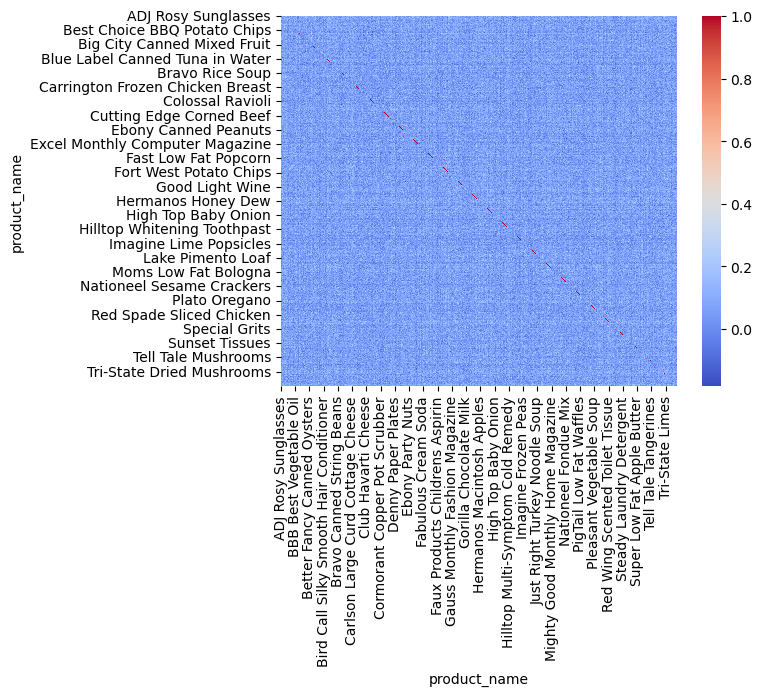

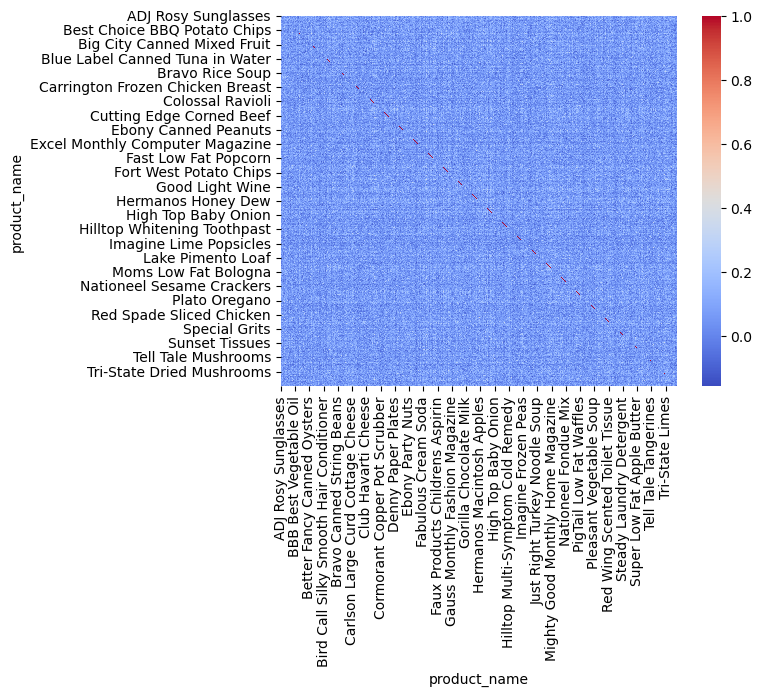

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# решил сделать еще тепловую карту, потому что почему бы и нет

sns.heatmap(corr_matrix_spearman, cmap='coolwarm')
plt.show()
sns.heatmap(corr_matrix_pearson, cmap="coolwarm")
plt.show()


In [75]:
pearson_correlations = corr_matrix_pearson["American Chicken Hot Dogs"].drop(labels=["American Chicken Hot Dogs"])
spearman_correlations = corr_matrix_spearman["American Chicken Hot Dogs"].drop(labels=["American Chicken Hot Dogs"])

most_correlated_pearson = pearson_correlations.idxmax()
pearson_value = pearson_correlations[most_correlated_pearson]

most_correlated_spearman = spearman_correlations.idxmax()
spearman_value = spearman_correlations[most_correlated_spearman]

# ударение на о
print(f"Большая корреляция с {most_correlated_pearson} по Пирсону: {pearson_value}")
print(f"Большая корреляция с {most_correlated_spearman} по Спирману: {spearman_value}")

Большая корреляция с Better Canned Tuna in Oil по Пирсону: 0.2976601576663104
Большая корреляция с Carlson Sour Cream по Спирману: 0.2580978387271545


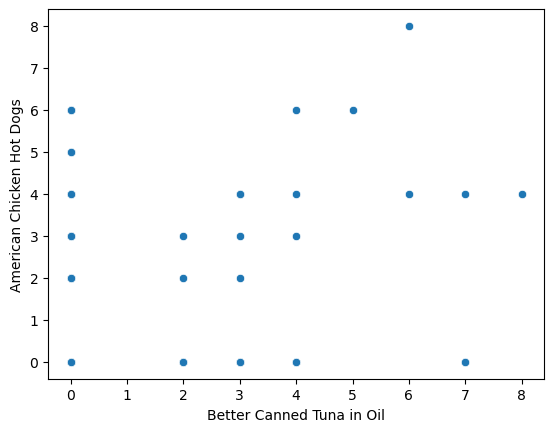

In [77]:
sales_target_product = df_pivot['American Chicken Hot Dogs']
sales_correlated_product = df_pivot[most_correlated_pearson]

sns.scatterplot(x=sales_correlated_product, y = sales_target_product)
plt.show()

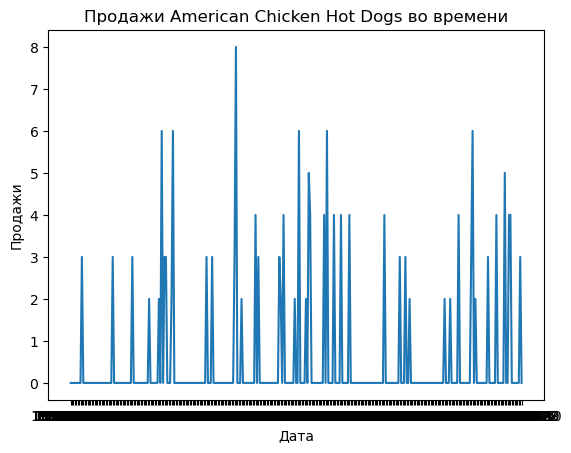

In [78]:
plt.plot(sales_target_product.index, sales_target_product.values)
plt.title(f'Продажи American Chicken Hot Dogs во времени')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()

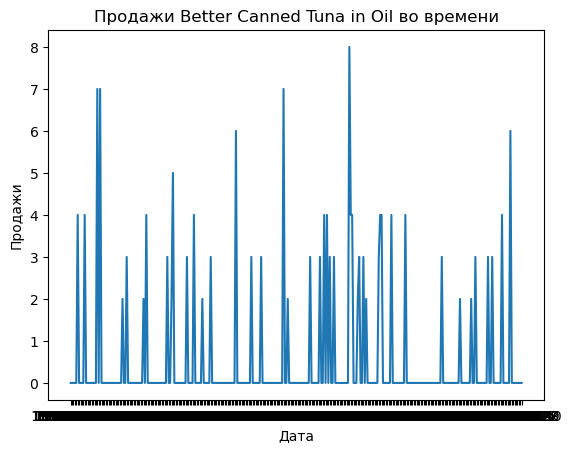

In [79]:
plt.plot(sales_correlated_product.index, sales_correlated_product.values)
plt.title(f'Продажи {most_correlated_pearson} во времени')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()

In [105]:
from sklearn.metrics import matthews_corrcoef

# считаем корреляцию мэтьюса

m_corr = matthews_corrcoef(df["recyclable_package"], df["low_fat"])

print(f"Корреляция Мэтьюса между recyclable_package и low_fat: {m_corr}")

Корреляция Мэтьюса между recyclable_package и low_fat: -0.022364293265823097


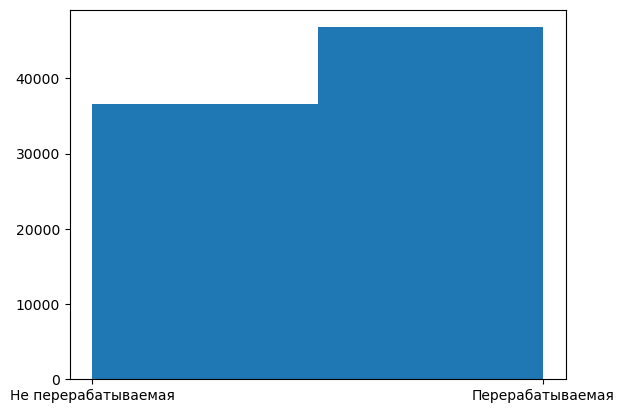

In [91]:
# строим гистограмму для перерабатываемых пакетов

plt.hist(df[["recyclable_package"]].astype(int), bins = df["recyclable_package"].unique().shape[0])
plt.xticks([0, 1], ['Не перерабатываемая', 'Перерабатываемая'])
plt.show()

In [97]:
from scipy.stats import chi2_contingency
import numpy as np

# считаем корреляцию Крамера
contingency_table = pd.crosstab(df["store_id"], df["brand_name"])

chi2, p, dof, expected = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()

k = min(contingency_table.shape) - 1

cramers_v = np.sqrt(chi2 / (n * k))

print(f"Корреляция Крамера V между store_id и brand_name: {round(cramers_v, 3)}")


Корреляция Крамера V между store_id и brand_name: 0.034


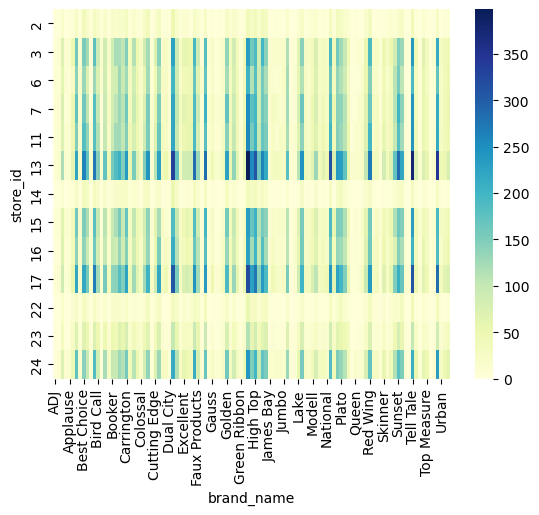

In [98]:
# тепловая карта для таблицы сопряженности
sns.heatmap(contingency_table, cmap='YlGnBu')

plt.xlabel('brand_name')
plt.ylabel('store_id')
plt.show()
# выглядит если честно так себе

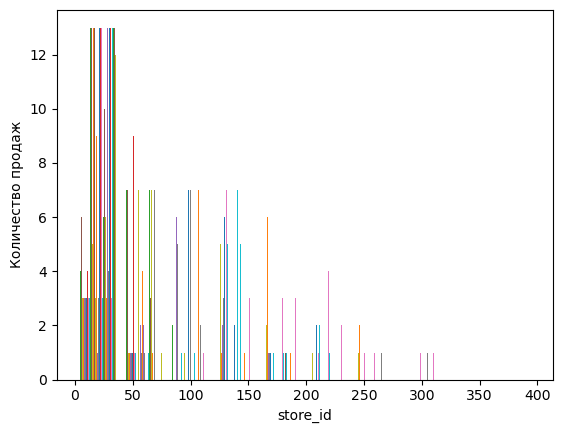

In [104]:
# гистограмма по сгруппированым магазинам
group_data = df.groupby(['store_id', 'brand_name']).size().reset_index(name='counts')

pivot_data = group_data.pivot(index='store_id', columns='brand_name', values='counts').fillna(0)

plt.hist(pivot_data)
plt.xlabel("store_id")
plt.ylabel("Количество продаж")
plt.show()
